# Non traditional use of coordinates

In [1]:
push!(LOAD_PATH,"C:/JMB/divand.jl/src","."); using divand;cd("C:/JMB/divand.jl");cd("examples");using PyPlot


Imagine a signal as the following

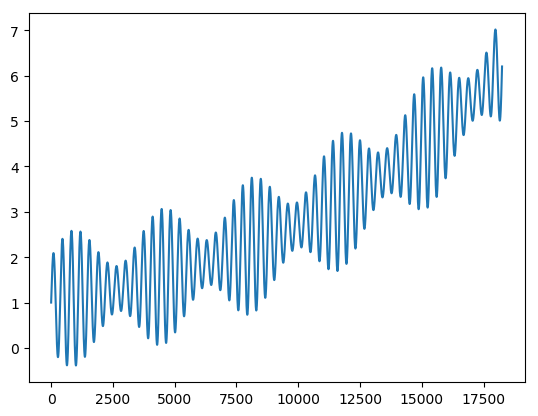

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000026860390>

In [2]:
years=50
samplingdistance=1
t=collect(0:samplingdistance:365*years);

f=(1+0.5*sin.(2*pi*t/3600.)).*sin.(2*pi*t/365)+ exp.(t/10000.)
plot(t,f)

But which you sample only marginally

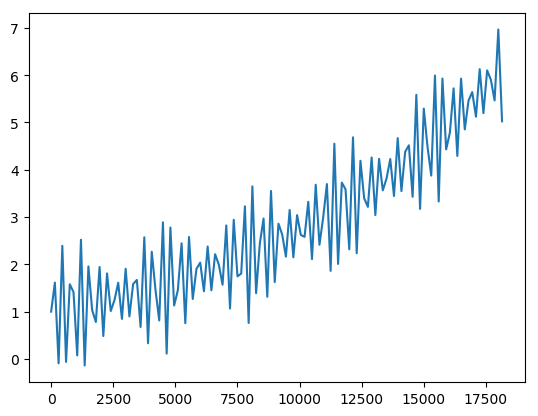

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000026B512E8>

In [4]:
samplingdistance=150
t=collect(0:samplingdistance:365*years);

f=(1+0.5*sin.(2*pi*t/3600.)).*sin.(2*pi*t/365)+ exp.(t/10000.)
plot(t,f)

To which you add some noise

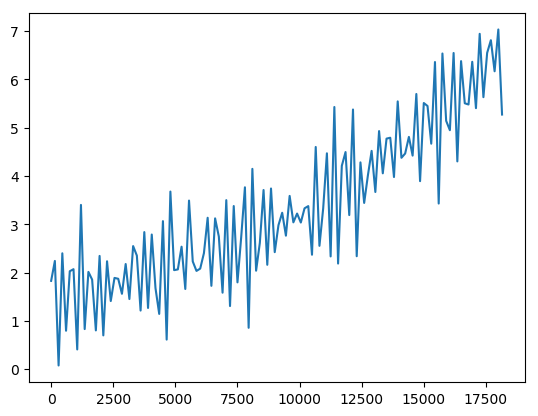

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000026DC9E80>

In [5]:
f=f+rand(size(f));
plot(t,f)

If you KNOW there is a periodic signal with KNOWN period use a new coordinate

In [6]:
t1=mod.(t,365);

Now analyse in the (t,t1) space ! Length scale for t: 1000 and for t1: 100. And force periodicity in t1.

In [24]:
xi,yi = ndgrid(linspace(0,years*365,100),linspace(0,365.,110));
mask = trues(xi);

# this problem has a simple cartesian metric
# pm is the inverse of the resolution along the 1st dimension
# pn is the inverse of the resolution along the 2nd dimension

pm = ones(xi) / (xi[2,1]-xi[1,1]);
pn = ones(xi) / (yi[1,2]-yi[1,1]);

fi,s=divandrun(mask,(pm,pn),(xi,yi),(t,t1),f-mean(f),(1000.,100.),0.5;moddim=[0,365]) ;

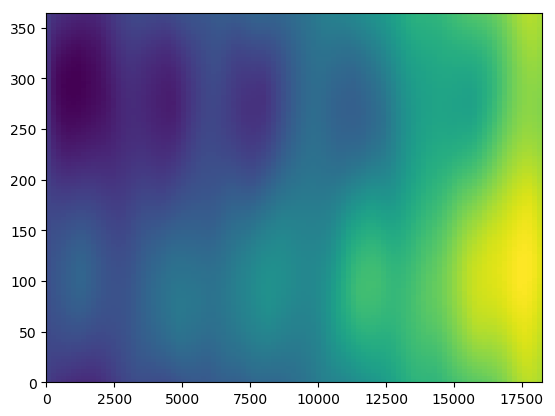

PyObject <matplotlib.collections.PolyCollection object at 0x000000003B535EF0>

In [25]:
pcolor(xi,yi,fi)

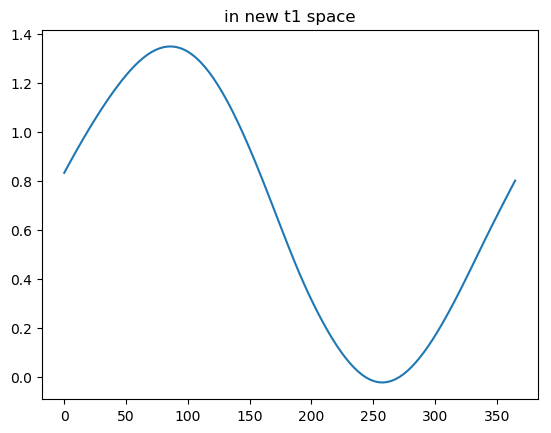

PyObject Text(0.5,1,u'in new t1 space')

In [26]:
plot(yi[1,:],fi[70,:])
title("in new t1 space")

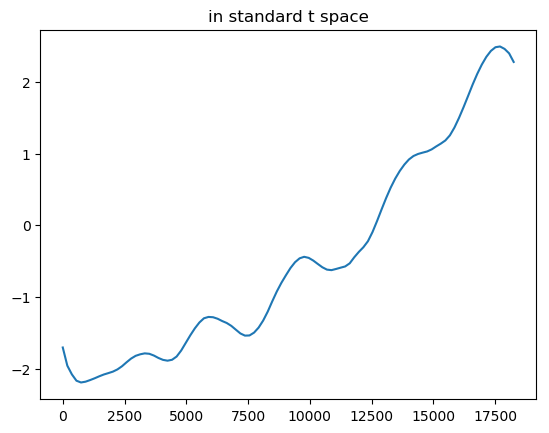

PyObject Text(0.5,1,u'in standard t space')

In [27]:
plot(xi[:,70],fi[:,70])
title("in standard t space")

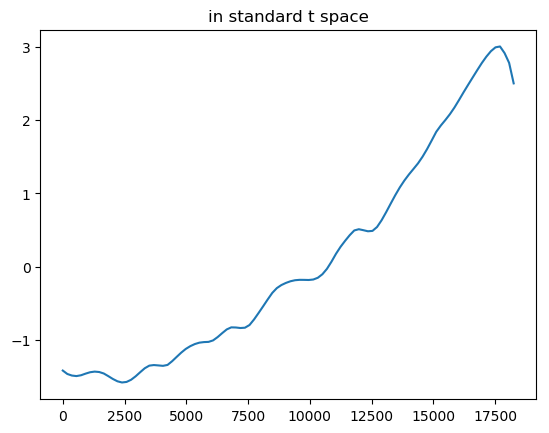

PyObject Text(0.5,1,u'in standard t space')

In [28]:
plot(xi[:,55],fi[:,55])
title("in standard t space")

# Can be used for daily cycles, annual cycles, but also tidal cycles